МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Алексей Романенко, alexromsput@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

При $\alpha$, близком к единице, последние значения берутся с большими весами, чем начальные, а в пределе учитывается только последнее значение( наивное предсказание). При $\alpha$, близком к нулю, больше учитываются начальные значения, соотв. в пределе имеем в качестве предсказание 1 значение.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Запишем уравнения для изменения тренда: $b_t = \alpha_2\cdot(l_t - l_{t-1}) + (1 - \alpha_2)\cdot b_{t-1}$, где 
$ l_t = \alpha_1y_t + (1 - \alpha_1)(l_{t-1} + b_{t-1})$, $y_{t+h} = l_t + h\cdot b_t$

Получается, что при $\alpha_2$, близком к нулю, на новое значение сильно влияет предыдущее, а при $\alpha_2$, близком к 1, сглаживание не такое сильное, поэтому при плавно меняющемся тренде нужно использовать маленькие значения $\alpha_2$, а при стохастически меняющемся большие.

**Вопрос 3**: Выпишите формулу временного ряда, соответствующих следующим ARIMA моделям
  
  1) ARIMA $(p=0,q=1,d=s)$
  
  2) ARIMA $(p=0,q=s+1,d=1)(P=1, Q=0, D=1)_m$

1) $(1−B)^sy_t = c+(1+\theta_1B)e_t$, где В - оператор сдвига: $B^ky_t = y_{t-k}$, $e_t = y_t - \hat y_t$

2) $(1-\alpha B^m)(1-B)(1-B^m)y_t = c + (1+\beta_1 B + \dots + \beta_q B^q)e_t$

**Вопрос 4**:  Приведите пример такой модели типа ЭС (экспоненциальное сглаживание), которой нет эквивалента среди семейства ARIMA. 

В ARIMA все преобразования предыдущих значений линейные, поэтому если взять любое нелинейное экспоненциальное сглаживание, то ему не будет эквивалента.
**Вопрос 5**:  В чем принципиальное отличие между адаптивной композицей и адаптивной селективной моделью прогнозирования?
В какие случаях предполчительнее использовать адаптивную селекцию нежели адаптивную композцию?

В адаптивной селекции на каждом шаге выбираются несколько лучших моделей и происходит их усреднение, а в адаптивной композиции берется просто взвешенная сумма, веса которой и улучшаются на каждом шаге.

**Вопрос 6**: Что такое hold-out период и out-of-sample период?

Hold-out - валидационный период - часть выборки, не использующаяся в трейне, расположенная после него по времени и использующаяся для валидации модели. Out-of-sample - тестовая часть, идет позже hold-out.

** Вопрос 7**: Опишите, что такое автокорреляционная функция и частная автокорреляционная функция.
Зачем они нужны?

Автокорреляционная функция в точке k это корреляция между рядом и его сдвигом на k.
Частная автокорреляционная функция в точке k это k-ый коэффициент в AR модели $\hat y_k = c+\phi_1y_{t−1}+\phi_2y_{t−2}+\dots+\phi_k y_{t−k}+e_t$


-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Оценка точности моделей прогнозирования</h1> 

Задача 1

    Приведите пример временного ряда и модели прогнозирования, когда оценка точности прогнозирования на hold-out (validation set) периоде будет завышена по сравнению с точностью на периоде out-of-sample (test Set).
**<Решение>**
Например, модель Хольта и если тренд на тесте очень сильно отличается от тренда на трейне и validation-е, например, он взят вообще из другой выборки :)


<h1 align="center">Реализация модели Уинтерса</h1>
Нужно реализовать модель Уинтерса c аддитивной сезонностью, применить её для прогнозирования временных рядов


<h2 align="left">Анализ временных рядов</h2>

* Отобразите интегральные продажи в departure 36 и убедитесь, что нет чёткой выраженной сезонности.
* Чему равен минимальный период сезонности во временных рядах departre 42?
* Чётко ли видна сезонность в интегральных продажах для departure 6?

#### Данные
    * TS_dep36.csv - временные ряды продаж в departure 36 (только ряды с сезонной компонентой)
    * TS_dep42.csv - врeменные ряды продаж в departure 42 (только ряды без сезонности)
    * TS_dep6.csv - как сезонные, так и НЕсезонные временные ряды продаж в departure 6

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing

%matplotlib inline


ts_36 = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal=',', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_42 = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_6 = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

In [2]:
ts_36.head()

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0.000,0.000,2.484,0.000,0.0,1.334,1,1,2.0,0,...,7,12,0.0,66.324,32.864,12,23,63,14,177
2005-05-13,0.878,0.983,2.632,1.120,1.0,3.514,4,0,1.0,0,...,16,17,0.0,69.952,34.024,24,30,97,13,63
2005-05-14,0.332,1.346,2.016,0.302,1.0,2.590,0,2,0.0,1,...,11,12,0.0,35.366,31.626,20,0,80,12,94
2005-05-15,0.000,0.556,0.882,0.000,4.0,1.708,1,1,1.0,2,...,9,15,0.0,37.898,43.726,20,0,64,6,105
2005-05-16,0.438,0.671,0.314,1.486,2.0,2.790,3,0,2.0,1,...,11,11,0.0,49.566,34.548,23,0,43,4,51


In [3]:
ts_42.head()

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ts_6.head()

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


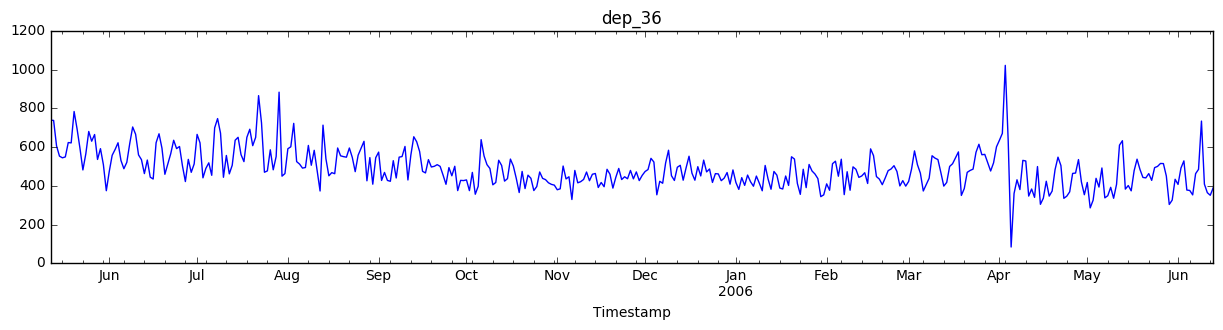

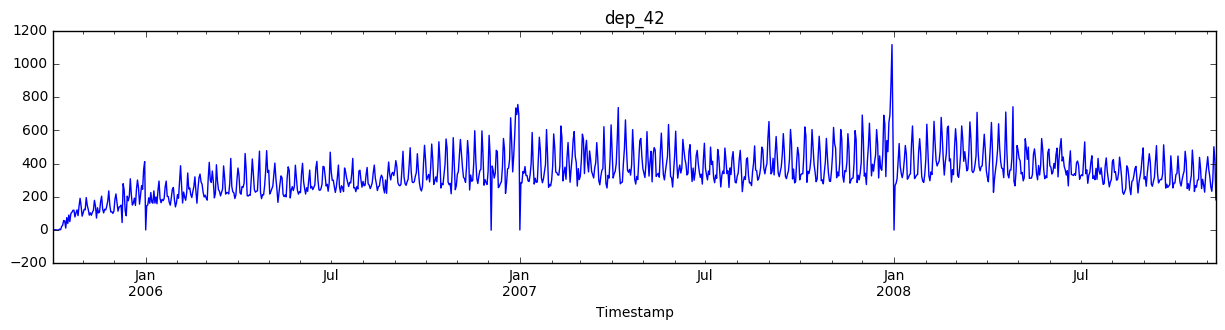

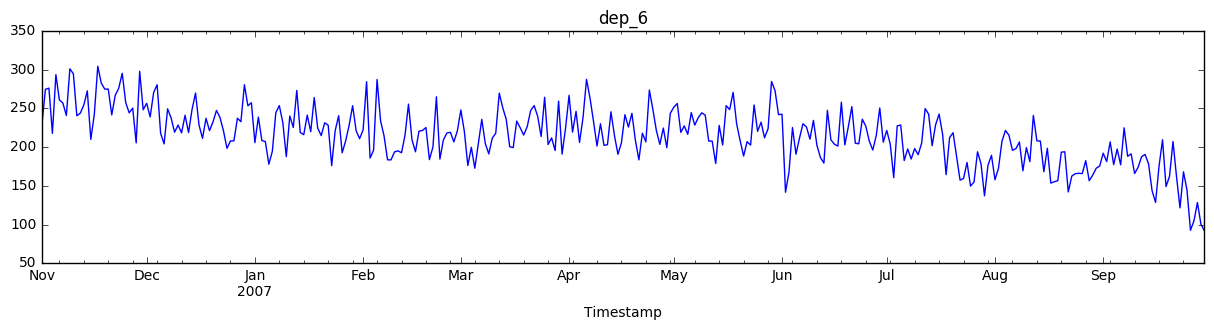

In [5]:
# Постройте несколько картинок для каждого из departure, чтобы ответить на вопросы
ts_36.sum(axis=1).plot(figsize=(15,3))
plt.title('dep_36')
plt.figure()
ts_42.sum(axis=1).plot(figsize=(15,3))
plt.title('dep_42')
plt.figure()
ts_6.sum(axis=1).plot(figsize=(15,3))
plt.title('dep_6')
plt.show()

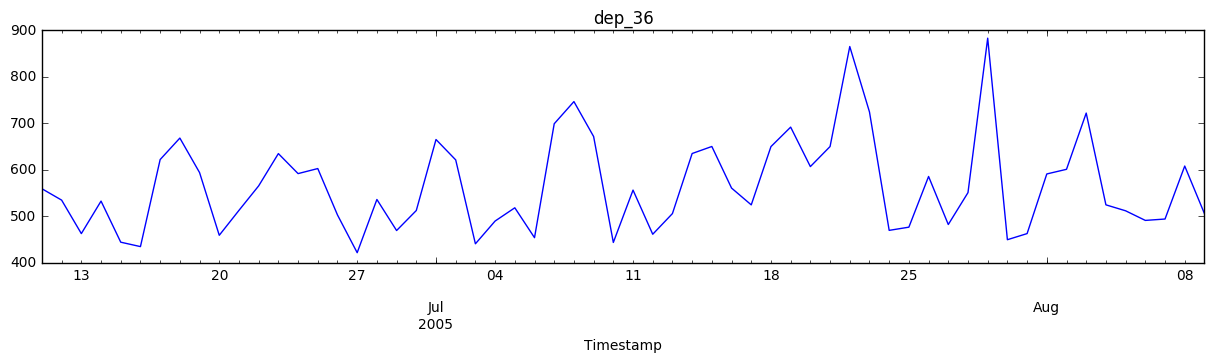

In [6]:
ts_36[30:90].sum(axis=1).plot(figsize=(15,3))
plt.title('dep_36')

Действительно, сезонности нет.

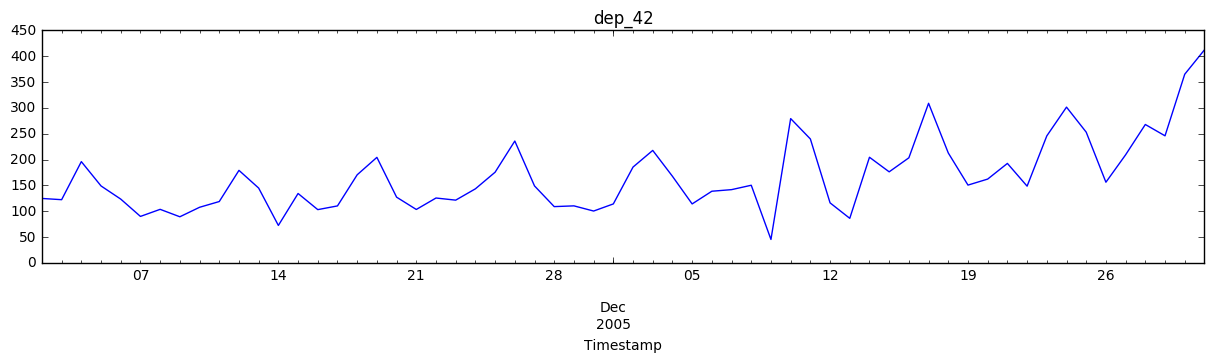

In [7]:
ts_42[30:90].sum(axis=1).plot(figsize=(15,3))
plt.title('dep_42')

Минимальный период сезонности dep42 - 1 неделя

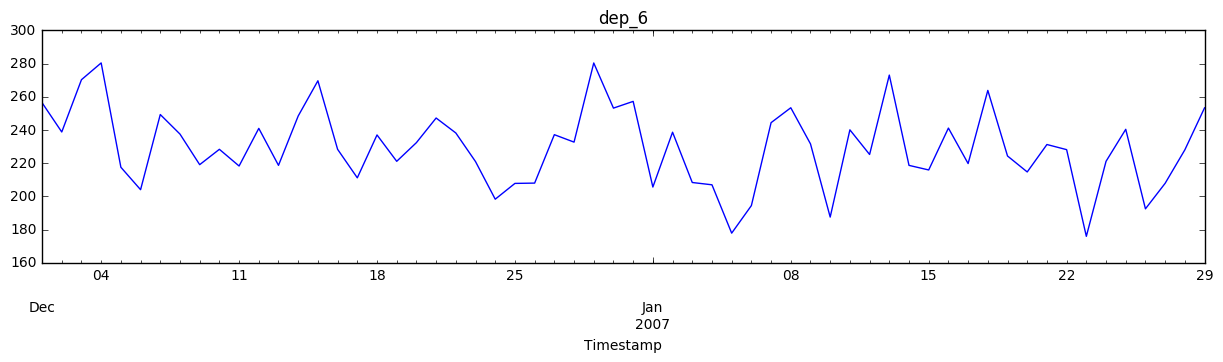

In [8]:
ts_6[30:90].sum(axis=1).plot(figsize=(15,3))
plt.title('dep_6')

Сезонность выражена нечетко

In [28]:
# Winters Exponential Smoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    s = Params['seasonality_period']
    
    FORECAST = np.array([np.nan]*(T + h))
    
    a = 0
    b = np.zeros(s)
    
    for cntr in range(T):
        try:
            not_nan = not math.isnan(x[cntr])
        except:
            not_nan = False
        if not_nan:
            a_prev = a    
            a = alpha * (x[cntr] - b[cntr % s]) + (1 - alpha) * a_prev
            b[cntr % s] = delta * (x[cntr] - a_prev) + (1 - delta) * b[cntr % s]
            
            #else do nothing
        FORECAST[cntr + h] = a + b[(cntr + h) % s]
    return FORECAST

<h2 align="left">Проверка на адеквантность</h2>

* Проверку лучше всего проводить на данных для departure 6
* Постройте картинку по соответствию суммы прогнозов сумме значений всех временных рядо
* Оцените интегральную точность предсказаний на всех временных рядах по всей истории по qualityMedianAE: ошибка не должна быть сильно больше, чем среднеe значение одного временного ряда 

In [29]:
from datetime import timedelta
# Прогноз на 1 шаг вперёд
h = 1
ts = ts_6
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(ts[cntr], h, {'alpha':0.6, 'delta': 0.8, 'seasonality_period': 7})

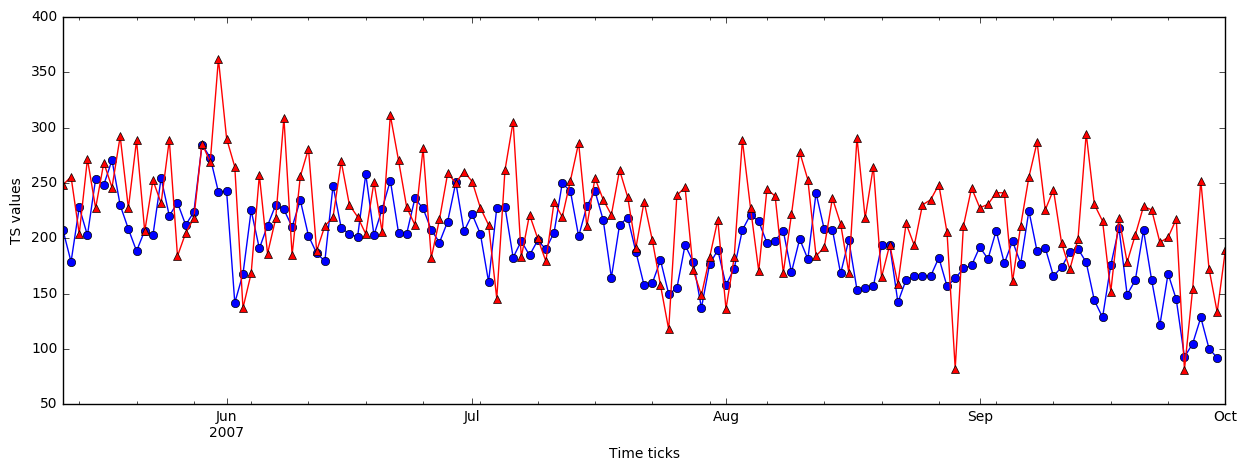

In [30]:
# Визуальная проверка прогноза на адекватность
ts_num = 0
ts.sum(axis=1).ix['2007-05-12':'2008-06-01'].plot(style='b', linewidth=1.0, marker='o')
w_frc_ts.sum(axis=1).ix['2007-05-12':'2008-06-01'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
# plt.legend()

In [65]:
?qualityMedianAE

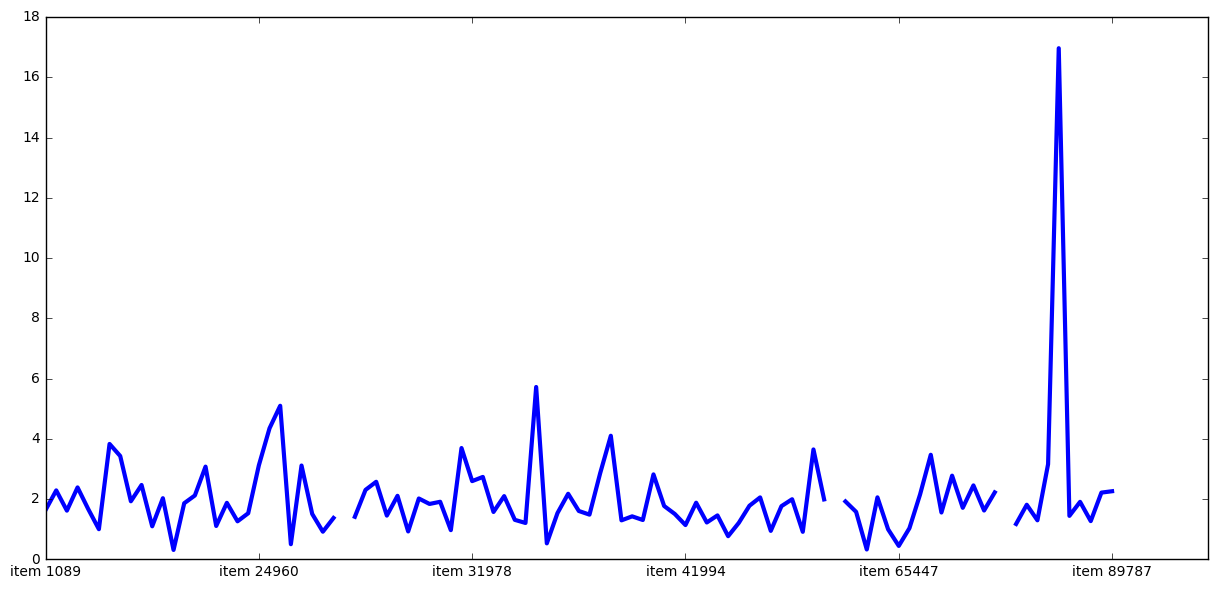

In [31]:
# анализ точности предсказаний
# QualityStr = pd.DataFrame(index = ts.columns, columns = ['WinterES'])

# Quality through 1500 steps
ix = list(range(len(ts.index)))
QualityStr= qualityMedianAE(ts.ix[ix], w_frc_ts.ix[ix])[0]

QualityStr.plot(figsize = (15,7), linewidth=3.0)

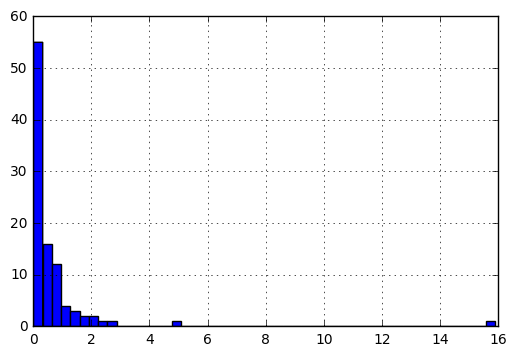

In [32]:
# Сравните точность предсказаний по каждому временному ряду с его средним значением
diffs = pd.Series(index=QualityStr.index)
for col in QualityStr.index:
    diffs[col] = np.abs(QualityStr[col]-ts[col].mean())
diffs.hist(bins=50)

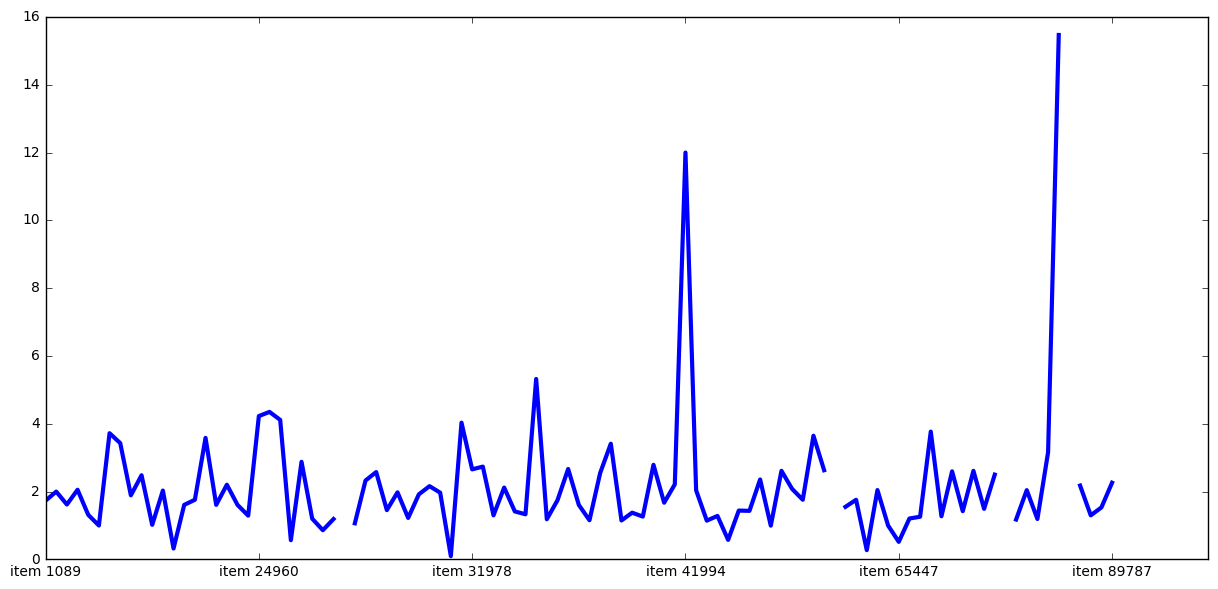

In [14]:
# Оцените точность предсказаний на первых 100 отсчётах каждого временного ряда
QualityStr = qualityMedianAE(ts.ix[range(100)], w_frc_ts.ix[range(100)])[0]
QualityStr.plot(figsize = (15,7), linewidth=3.0)

In [19]:
# подберите оптимальное значение параметров \alpha и \delta на данных по departure 36
ts=ts_36
for alpha in np.arange(0.1, 1.1, 0.2):
    for delta in np.arange(0.1, 1.1, 0.2):
        print("alpha: {} delta: {}".format(alpha, delta), end=' ')
        range_ = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
        w_frc_ts = pd.DataFrame(index=ts.index.append(range_), columns=ts.columns)
        for i, col in enumerate(ts.columns):
            w_frc_ts[col] = WintersExponentialSmoothing(ts[col], h, {'alpha':alpha, 'delta':delta, 'seasonality_period':7})
        QualityStr = qualityMedianAE(ts.sum(axis=1)[:len(ts.index)],
                                     w_frc_ts.sum(axis=1)[:len(ts.index)])[0]
        print("score: {}".format(QualityStr))

alpha: 0.1 delta: 0.1 score: 49.24381350999204
alpha: 0.1 delta: 0.30000000000000004 score: 52.298229078643544
alpha: 0.1 delta: 0.5000000000000001 score: 58.90780660960735
alpha: 0.1 delta: 0.7000000000000001 score: 58.14517399424085
alpha: 0.1 delta: 0.9000000000000001 score: 60.30955248439392
alpha: 0.30000000000000004 delta: 0.1 score: 48.01149292818627
alpha: 0.30000000000000004 delta: 0.30000000000000004 score: 54.080149787747814
alpha: 0.30000000000000004 delta: 0.5000000000000001 score: 56.292918992921614
alpha: 0.30000000000000004 delta: 0.7000000000000001 score: 59.046067611302135
alpha: 0.30000000000000004 delta: 0.9000000000000001 score: 67.70471409837046
alpha: 0.5000000000000001 delta: 0.1 score: 47.217137969283385
alpha: 0.5000000000000001 delta: 0.30000000000000004 score: 51.73049275644519
alpha: 0.5000000000000001 delta: 0.5000000000000001 score: 58.542398259623326
alpha: 0.5000000000000001 delta: 0.7000000000000001 score: 70.8563816942214
alpha: 0.5000000000000001 del

In [20]:
best_alpha = 0.5
best_delta = 0.1

<h2 align="left">Сравнение с простым экспоненциальным сглаживанием</h2> 

* Сравните точность предсказаний по реализованной модели Уинтерса с точностью предсказаний простого экспоненциального сглажвания с alpha=0.1, AdaptationPeriod = 10
       - на данных по departure 42
       - на данных по departre 6

  Замечание1: оптимальные параметры для модели Уинтерса подобраны на предыдущем шаге
  Замечания2: quality function для оценки точности выберите сами
  
* Сравнивая точность прогнозов простого ЭС и прогнозов модели Уинтерса, определите для каждого ряда departre 6 обладает ли он сезонной компонентой или нет. Выпише номер сезонных временных рядов

In [36]:
# ибо через utils.py не работает
def ExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        try:
            not_nan = not math.isnan(x[t])
        except:
            not_nan = False
        if not_nan:
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST	

In [49]:
def compare(ts, alpha, delta, seasonality, test_seasonality=False, col=''):
    range_ = pd.date_range(ts.index[-1] + timedelta(1), ts.index[-1] + timedelta(h))
    w_frc_ts = pd.DataFrame(index=ts.index.append(range_), columns=ts.columns)
    es_frc_ts = pd.DataFrame(index=ts.index.append(rng), columns=ts.columns)
    for col in ts.columns:
        w_frc_ts[col] = WintersExponentialSmoothing(ts[col], h, {'alpha':alpha,
                                                                 'delta':delta,
                                                                 'seasonality_period':seasonality})
        es_frc_ts[col] = ExponentialSmoothing(ts[col], h, {'alpha':0.1, 'AdaptationPeriod': 10})
    w_quality = qualityMedianAE(w_frc_ts.sum(axis=1), ts.sum(axis=1))[0]
    es_quality = qualityMedianAE(es_frc_ts.sum(axis=1), ts.sum(axis=1))[0]
    if not test_seasonality:
        print("Winters: {} ExpSmoothing: {}".format(w_quality, es_quality))
    elif es_quality - w_quality > 0.1:
        print(col)

In [40]:
compare(ts_42, best_alpha, best_delta, 7)

Winters: 34.16057796222327 ExpSmoothing: 65.32374799105304


In [41]:
compare(ts_6, best_alpha, best_delta, 7)

Winters: 24.47226636622844 ExpSmoothing: 37.3960550491268


In [50]:
for col in ts_6.columns:
    compare(ts_6[[col]], best_alpha, best_delta, 7, True, col)

item 28560
item 28632
item 32289
item 34190
item 37419
item 48206
item 66201
item 67270
item 76722
item 79747
item 89787


<h1 align="center">Прогнозирование рядов электроэнергии</h1>

<h2 align="left">Данные</h2>
* Временные ряды потребления электроэнергии energy_consumption.csv:
    - целевая переменная - объемы электроэнергии, производимые на электростанции
    - каждый временной ряд соответствует отдельному региону (Hub)
    - временной шаг - день
    - вспомогательные переменные (Temp1, Temp2 - температуры, Sunday, Saturday - разметка праздников, и др)

** Задание**
* Подберите наиболее оптимальные для прогнозирования объёмов электроэнергии параметры модели ARIMAX согласно следующему фреймворку:
     - по временному ряду потребления электроэнергии в регионе 'Center' (брать данные до 01.01.2015) определите наборы возможных значений параметров p, d, q (около 3-5 вариантов для каждого параметра)
         
     - путем перебора значений параметров из предыдущего шага и добавляя или не добавляя все экзогенные переменные ("Temp1", "Temp2", "Saturday", "Sunday") определите оптимальную концигурацию параметров. В качестве hold-out пеприода использовать период с 01.01.2015 по 30.04.2015.

In [51]:
import statsmodels.api as sm
from scipy import stats

In [55]:
# считайте данные energy_consumption в структуру pandas
energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']

In [56]:
#  выделите периоды для настройки параметров, для выбора лучшей модели, для оценки точности
train_ts = energy_ts[energy_ts.index<'2015-01-01']
valid_ts = energy_ts[energy_ts.index<'2015-05-01']
extra_ts = energy_ts[energy_ts.index>='2015-05-01']


# для train и validation нужно исключить NaN
train_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna(inplace = True)
valid_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna(inplace = True)

# для extra_ts NaN в экзогенных переменных нужно заменить на последнее не NaN значение
extra_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].fillna(method='ffill')


/Users/nastya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nastya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,,
2015-05-01,140054.025,8.2,5.1,0.0,1.0
2015-05-02,139146.556,7.5,4.9,1.0,0.0
2015-05-03,139743.874,6.5,2.7,0.0,1.0
2015-05-04,138947.169,7.5,3.1,0.0,1.0
2015-05-05,148874.643,8.8,5.4,0.0,0.0
2015-05-06,147576.349,16.0,10.6,0.0,0.0
2015-05-07,147022.019,15.1,11.2,0.0,0.0
2015-05-08,145096.536,10.5,9.6,0.0,0.0
2015-05-09,135096.565,8.0,7.9,1.0,0.0


<h2 align="left">Выбор значений параметров p, q, d</h2>

In [57]:
# Данные для региона Center
dta = train_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]

/Users/nastya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


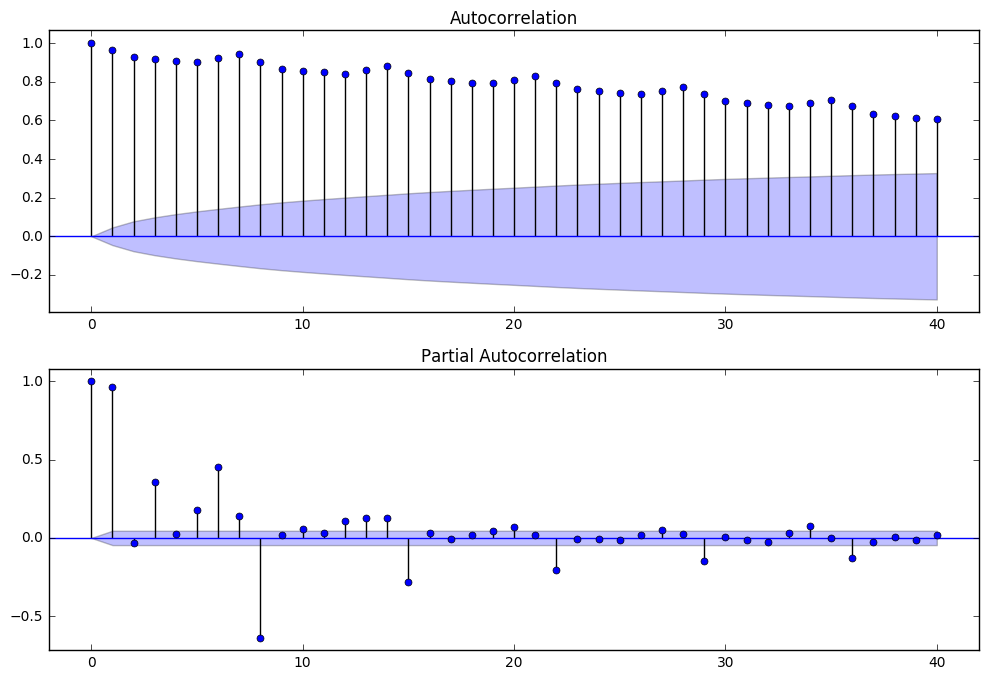

In [58]:
# Проанализируйте:  автокорреляционной функции (ACF) и частной коррелационной функции (PACF) для исходного временного ряда
# Стационарен ли он?
# Если нет, тогда постройте ARIMA модель с d>0, глядя на ACF и PACF регрессионных остатков модели ARIMA, примите решение, стоит ли увеличивать d

# Use energy data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta['EnergyConsump'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta['EnergyConsump'], lags=40, ax=ax2)

Коэффициенты автокорреляционной функции убывают медленно, значит ряд не стационарен.

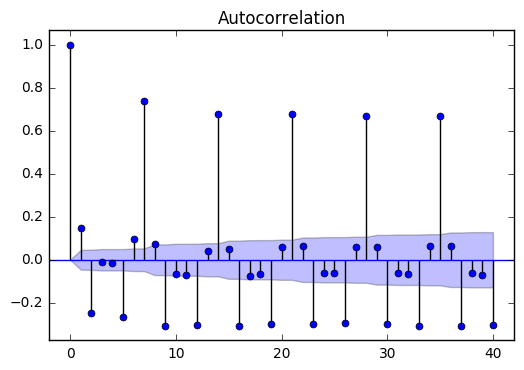

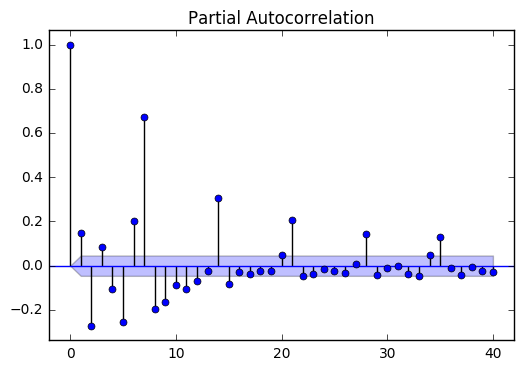

In [60]:
arima = sm.tsa.ARIMA(dta.EnergyConsump, (1,1,1)).fit()
sm.graphics.tsa.plot_acf(arima.resid, lags=40)
plt.figure()
sm.graphics.tsa.plot_pacf(arima.resid, lags=40)
plt.show()

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте алгоритм адаптивной селекции или адаптивной композиции  
- Подберите параметры реализованной композиции так, чтобы для данных из departure 6 прогноз композии был точнее, чем прогноз отдельного базового алгоритма на всех временных рядах 